In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
mar22_df = pd.read_csv('TU_enviData0322.csv')
apr22_df = pd.read_csv('TU_enviData0422.csv')
may22_df = pd.read_csv('TU_enviData0522.csv')
jun22_df = pd.read_csv('TU_enviData0622.csv')
jul22_df = pd.read_csv('TU_enviData0722.csv')
aug22_df = pd.read_csv('TU_enviData0822.csv')
sep22_df = pd.read_csv('TU_enviData0922.csv')
oct22_df = pd.read_csv('TU_enviData1022.csv')
nov22_df = pd.read_csv('TU_enviData1122.csv')
dec22_df = pd.read_csv('TU_enviData1222.csv')

jan23_df = pd.read_csv('TU_enviData0123.csv')
feb23_df = pd.read_csv('TU_enviData0223.csv')
mar23_df = pd.read_csv('TU_enviData0323.csv')
df_list = [mar22_df,apr22_df,may22_df,jun22_df,jul22_df,aug22_df,
          sep22_df,oct22_df,nov22_df,dec22_df,jan23_df,feb23_df,mar23_df]
z_ill_list = [mar22_df,apr22_df,feb23_df,mar23_df ]
all_df = pd.concat(df_list, ignore_index=True)
z_ill_df = pd.concat(z_ill_list,ignore_index=True)
all_df

,gw_timestamp,time_stamp,err_flag,wind_velocity,wind_direction,temperature,humidity,air_pressure,illuminance,rain_level,...,ultra_violet_b,acceleration_x,acceleration_y,acceleration_z,inclination_xz,inclination_yz,max_wind_velocity,direct_max_wind_velocity,max_inst_wind_velocity,direct_max_inst_wind_velocity
0,2022-03-01 00:06:15 +07,2022-03-01 00:06:15 +07,0,0.688,1.130031e+09,28,83,1010,0,0,...,0.0,0,0,1,4.1,7.0,0.000,0,0.000,0
1,2022-03-01 00:16:15 +07,2022-03-01 00:16:15 +07,0,0.229,0.000000e+00,28,82,1010,0,0,...,0.0,0,0,1,4.1,7.1,0.000,0,0.000,0
2,2022-03-01 00:26:15 +07,2022-03-01 00:26:15 +07,0,0.808,1.129487e+09,28,83,1010,0,0,...,0.0,0,0,1,3.9,7.2,0.000,0,0.000,0
3,2022-03-01 00:36:15 +07,2022-03-01 00:36:15 +07,0,0.265,0.000000e+00,28,83,1010,0,0,...,0.0,0,0,1,4.1,7.1,0.000,0,0.000,0
4,2022-03-01 00:46:15 +07,2022-03-01 00:46:15 +07,0,0.339,1.132095e+09,28,83,1010,0,0,...,0.0,0,0,1,4.1,7.0,0.000,0,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51856,2023-03-31 23:12:35 +07,2023-03-31 23:12:35 +07,32,0.884,1.380000e+02,29,78,1008,0,0,...,0.0,0,0,1,3.9,7.6,1.911,153,2.805,165
51857,2023-03-31 23:22:35 +07,2023-03-31 23:22:35 +07,32,0.881,1.233000e+02,29,77,1008,0,0,...,0.0,0,0,1,3.9,7.6,2.261,160,3.544,145
51858,2023-03-31 23:32:35 +07,2023-03-31 23:32:35 +07,32,1.021,1.329000e+02,29,77,1008,0,0,...,0.0,0,0,1,3.9,7.6,1.724,174,3.273,172
51859,2023-03-31 23:42:35 +07,2023-03-31 23:42:35 +07,32,1.330,1.641000e+02,29,77,1008,0,0,...,0.0,0,0,1,3.9,7.6,2.431,174,4.339,193


## Exploratory Data Analysis

In [4]:
all_df.columns

Index(['gw_timestamp', 'time_stamp', 'err_flag', 'wind_velocity',
       'wind_direction', 'temperature', 'humidity', 'air_pressure',
       'illuminance', 'rain_level', 'ultra_violet_a', 'ultra_violet_b',
       'acceleration_x', 'acceleration_y', 'acceleration_z', 'inclination_xz',
       'inclination_yz', 'max_wind_velocity', 'direct_max_wind_velocity',
       'max_inst_wind_velocity', 'direct_max_inst_wind_velocity'],
      dtype='object')

In [5]:
all_df.describe()

,err_flag,wind_velocity,wind_direction,temperature,humidity,air_pressure,illuminance,rain_level,ultra_violet_a,ultra_violet_b,acceleration_x,acceleration_y,acceleration_z,inclination_xz,inclination_yz,max_wind_velocity,direct_max_wind_velocity,max_inst_wind_velocity,direct_max_inst_wind_velocity
count,51861.000000,51861.000000,5.186100e+04,51861.000000,51861.000000,51861.000000,51861.000000,51861.000000,51861.000000,51861.000000,51861.0,51861.0,51861.000000,51861.000000,51861.000000,51861.000000,51861.000000,51861.000000,51861.000000
mean,27.013073,24.494598,2.976742e+08,28.624920,73.742986,1006.726731,26581.349048,2.136442,6.629735,0.043479,0.0,0.0,0.999672,4.023688,7.234348,1.383450,114.220532,2.165114,121.295193
std,11.617837,625.225129,4.960168e+08,3.680385,15.335252,32.201279,39619.260360,19.398189,13.995696,0.205288,0.0,0.0,0.018102,0.144616,0.282123,0.904166,97.262048,1.505229,102.400267
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.681000,7.330000e+01,26.000000,63.000000,1006.000000,0.000000,0.000000,0.070000,0.000000,0.0,0.0,1.000000,3.900000,7.100000,0.788000,48.000000,1.116000,41.000000
50%,32.000000,0.974000,1.045000e+02,28.000000,75.000000,1008.000000,374.000000,0.000000,0.260000,0.000000,0.0,0.0,1.000000,4.000000,7.100000,1.350000,80.000000,2.146000,82.000000
75%,32.000000,1.288000,1.113247e+09,31.000000,86.000000,1010.000000,45570.000000,0.000000,4.860000,0.000000,0.0,0.0,1.000000,4.100000,7.500000,2.022000,179.000000,3.116000,202.000000
max,39.000000,16677.216797,1.135863e+09,40.000000,100.000000,1019.000000,187166.000000,254.000000,328.329987,2.340000,0.0,0.0,1.000000,5.400000,9.600000,8.813000,360.000000,11.485000,360.000000


In [6]:
# swap first columns to illuminances
all_df.insert(0,"illuminance_temp",all_df["illuminance"])
all_df.drop("illuminance",axis=1,inplace=True)
all_df.rename(columns={"illuminance_temp":"illuminance"},inplace=True)
all_df=all_df.replace(np.nan,0)
all_df

,illuminance,gw_timestamp,time_stamp,err_flag,wind_velocity,wind_direction,temperature,humidity,air_pressure,rain_level,...,ultra_violet_b,acceleration_x,acceleration_y,acceleration_z,inclination_xz,inclination_yz,max_wind_velocity,direct_max_wind_velocity,max_inst_wind_velocity,direct_max_inst_wind_velocity
0,0,2022-03-01 00:06:15 +07,2022-03-01 00:06:15 +07,0,0.688,1.130031e+09,28,83,1010,0,...,0.0,0,0,1,4.1,7.0,0.000,0,0.000,0
1,0,2022-03-01 00:16:15 +07,2022-03-01 00:16:15 +07,0,0.229,0.000000e+00,28,82,1010,0,...,0.0,0,0,1,4.1,7.1,0.000,0,0.000,0
2,0,2022-03-01 00:26:15 +07,2022-03-01 00:26:15 +07,0,0.808,1.129487e+09,28,83,1010,0,...,0.0,0,0,1,3.9,7.2,0.000,0,0.000,0
3,0,2022-03-01 00:36:15 +07,2022-03-01 00:36:15 +07,0,0.265,0.000000e+00,28,83,1010,0,...,0.0,0,0,1,4.1,7.1,0.000,0,0.000,0
4,0,2022-03-01 00:46:15 +07,2022-03-01 00:46:15 +07,0,0.339,1.132095e+09,28,83,1010,0,...,0.0,0,0,1,4.1,7.0,0.000,0,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51856,0,2023-03-31 23:12:35 +07,2023-03-31 23:12:35 +07,32,0.884,1.380000e+02,29,78,1008,0,...,0.0,0,0,1,3.9,7.6,1.911,153,2.805,165
51857,0,2023-03-31 23:22:35 +07,2023-03-31 23:22:35 +07,32,0.881,1.233000e+02,29,77,1008,0,...,0.0,0,0,1,3.9,7.6,2.261,160,3.544,145
51858,0,2023-03-31 23:32:35 +07,2023-03-31 23:32:35 +07,32,1.021,1.329000e+02,29,77,1008,0,...,0.0,0,0,1,3.9,7.6,1.724,174,3.273,172
51859,0,2023-03-31 23:42:35 +07,2023-03-31 23:42:35 +07,32,1.330,1.641000e+02,29,77,1008,0,...,0.0,0,0,1,3.9,7.6,2.431,174,4.339,193


C:\Users\chusa\AppData\Local\Temp\ipykernel_19100\2055356115.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  all_corr=all_df.corr()


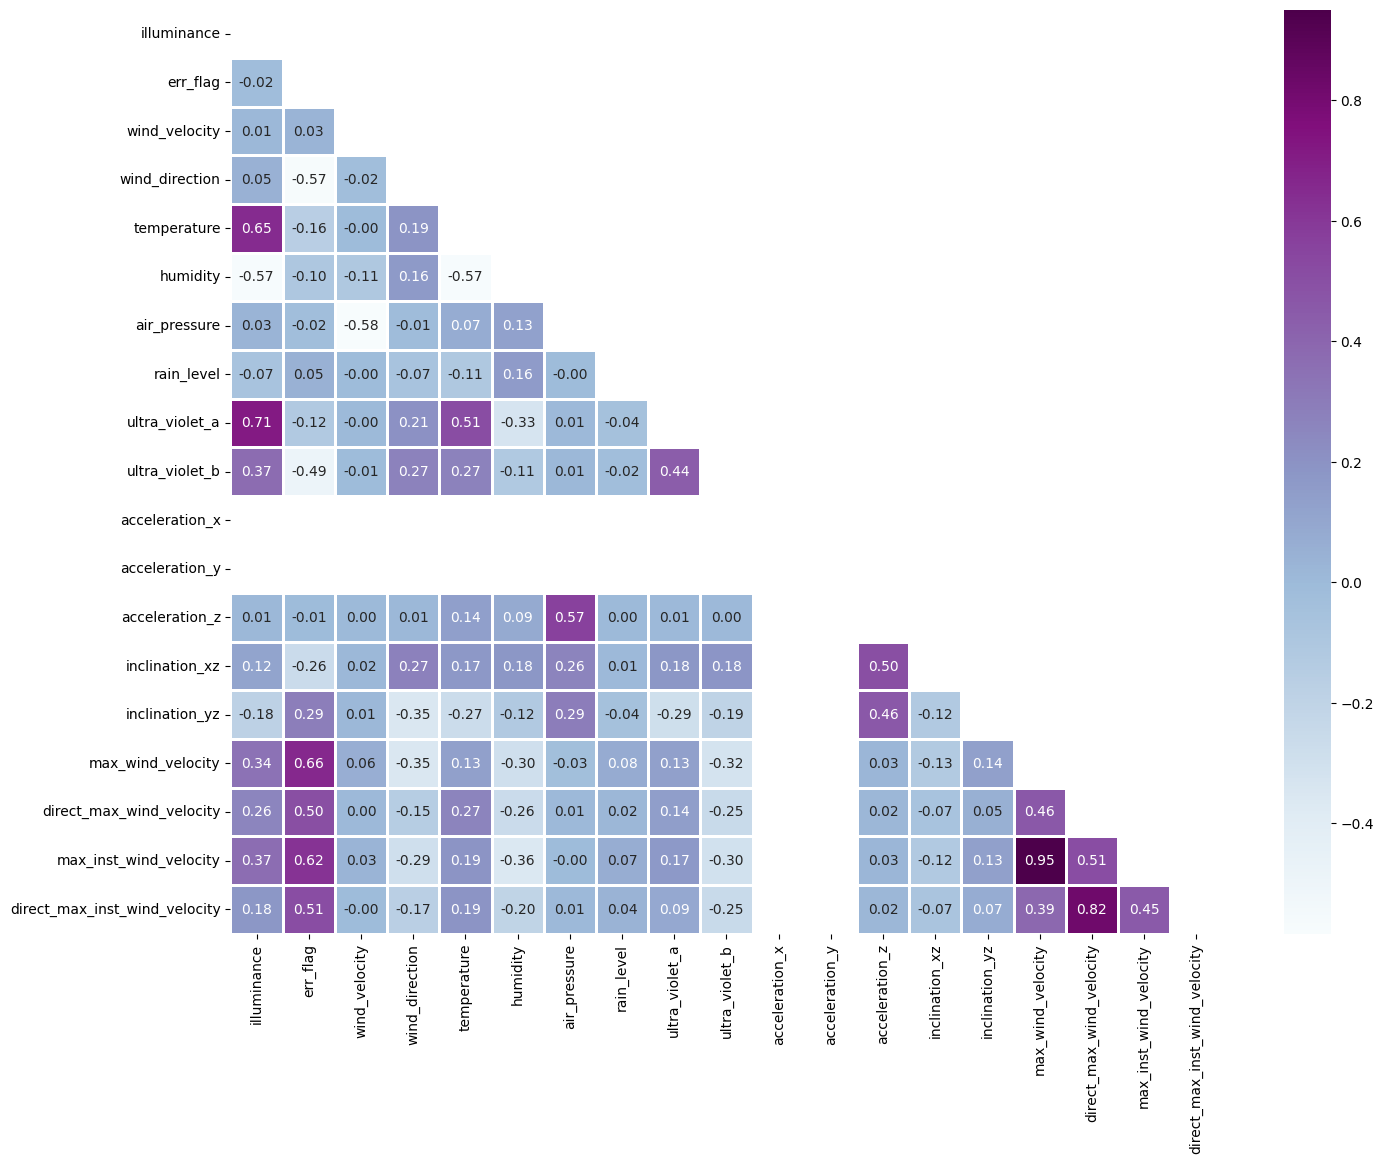

In [7]:
# find correlation to illuminance level
all_corr=all_df.corr()
mask_matrix = np.triu(all_corr)
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(all_corr, cmap="BuPu",linewidths=.9, annot=True, fmt=".2f",mask=mask_matrix);

In [8]:
# 1) same data from gw_timestamp-timestamp -> leave only one 2) no change in [err_flag,ultra_violet_b]
# get new cut dataframe from original dataframe
cut_lists = ["gw_timestamp","err_flag","wind_velocity","wind_direction","air_pressure","rain_level","acceleration_x","acceleration_y","acceleration_z","inclination_xz","inclination_yz","direct_max_inst_wind_velocity"]
prep_df = all_df.drop(cut_lists,axis=1)
prep_df

,illuminance,time_stamp,temperature,humidity,ultra_violet_a,ultra_violet_b,max_wind_velocity,direct_max_wind_velocity,max_inst_wind_velocity
0,0,2022-03-01 00:06:15 +07,28,83,0.02,0.0,0.000,0,0.000
1,0,2022-03-01 00:16:15 +07,28,82,0.03,0.0,0.000,0,0.000
2,0,2022-03-01 00:26:15 +07,28,83,0.02,0.0,0.000,0,0.000
3,0,2022-03-01 00:36:15 +07,28,83,0.02,0.0,0.000,0,0.000
4,0,2022-03-01 00:46:15 +07,28,83,0.02,0.0,0.000,0,0.000
...,...,...,...,...,...,...,...,...,...
51856,0,2023-03-31 23:12:35 +07,29,78,0.02,0.0,1.911,153,2.805
51857,0,2023-03-31 23:22:35 +07,29,77,0.02,0.0,2.261,160,3.544
51858,0,2023-03-31 23:32:35 +07,29,77,0.02,0.0,1.724,174,3.273
51859,0,2023-03-31 23:42:35 +07,29,77,0.02,0.0,2.431,174,4.339


In [9]:
prep_df.describe()

,illuminance,temperature,humidity,ultra_violet_a,ultra_violet_b,max_wind_velocity,direct_max_wind_velocity,max_inst_wind_velocity
count,51861.000000,51861.000000,51861.000000,51861.000000,51861.000000,51861.000000,51861.000000,51861.000000
mean,26581.349048,28.624920,73.742986,6.629735,0.043479,1.383450,114.220532,2.165114
std,39619.260360,3.680385,15.335252,13.995696,0.205288,0.904166,97.262048,1.505229
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,26.000000,63.000000,0.070000,0.000000,0.788000,48.000000,1.116000
50%,374.000000,28.000000,75.000000,0.260000,0.000000,1.350000,80.000000,2.146000
75%,45570.000000,31.000000,86.000000,4.860000,0.000000,2.022000,179.000000,3.116000
max,187166.000000,40.000000,100.000000,328.329987,2.340000,8.813000,360.000000,11.485000


C:\Users\chusa\AppData\Local\Temp\ipykernel_19100\534684675.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_corr=prep_df.corr()


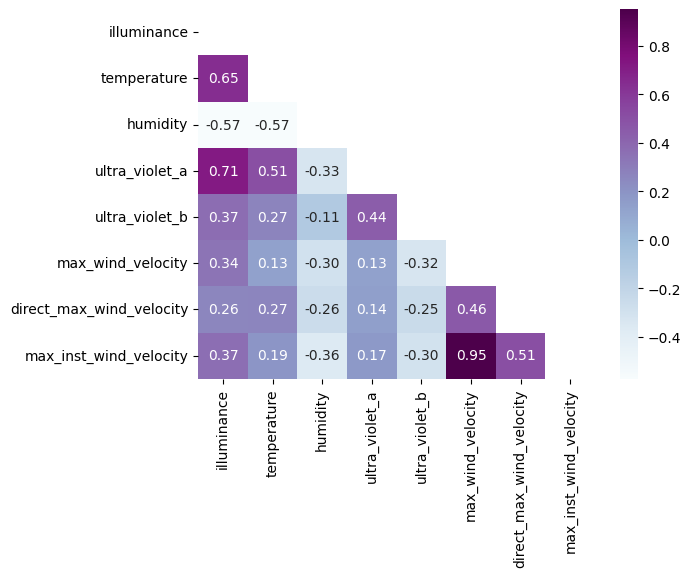

In [10]:
# find correlation to illuminance level
new_corr=prep_df.corr()
mask2_matrix = np.triu(new_corr)
sns.heatmap(new_corr, cmap="BuPu", annot=True, fmt=".2f",mask=mask2_matrix);

## Daily View

In [11]:
prep_df['time_stamp'] = pd.to_datetime(prep_df['time_stamp'])
prep_df['hour'] = prep_df['time_stamp'].dt.hour
prep_df['month'] = prep_df['time_stamp'].dt.month
prep_df

,illuminance,time_stamp,temperature,humidity,ultra_violet_a,ultra_violet_b,max_wind_velocity,direct_max_wind_velocity,max_inst_wind_velocity,hour,month
0,0,2022-03-01 00:06:15+07:00,28,83,0.02,0.0,0.000,0,0.000,0,3
1,0,2022-03-01 00:16:15+07:00,28,82,0.03,0.0,0.000,0,0.000,0,3
2,0,2022-03-01 00:26:15+07:00,28,83,0.02,0.0,0.000,0,0.000,0,3
3,0,2022-03-01 00:36:15+07:00,28,83,0.02,0.0,0.000,0,0.000,0,3
4,0,2022-03-01 00:46:15+07:00,28,83,0.02,0.0,0.000,0,0.000,0,3
...,...,...,...,...,...,...,...,...,...,...,...
51856,0,2023-03-31 23:12:35+07:00,29,78,0.02,0.0,1.911,153,2.805,23,3
51857,0,2023-03-31 23:22:35+07:00,29,77,0.02,0.0,2.261,160,3.544,23,3
51858,0,2023-03-31 23:32:35+07:00,29,77,0.02,0.0,1.724,174,3.273,23,3
51859,0,2023-03-31 23:42:35+07:00,29,77,0.02,0.0,2.431,174,4.339,23,3


In [12]:
prep_df['time_stamp'] = pd.to_datetime(prep_df['time_stamp'])
prep_df['hour_minute'] = prep_df['time_stamp'].dt.strftime('%H:%M')
prep_df['hour'] = prep_df['time_stamp'].dt.hour
prep_df['month'] = prep_df['time_stamp'].dt.month
prep_df

,illuminance,time_stamp,temperature,humidity,ultra_violet_a,ultra_violet_b,max_wind_velocity,direct_max_wind_velocity,max_inst_wind_velocity,hour,month,hour_minute
0,0,2022-03-01 00:06:15+07:00,28,83,0.02,0.0,0.000,0,0.000,0,3,00:06
1,0,2022-03-01 00:16:15+07:00,28,82,0.03,0.0,0.000,0,0.000,0,3,00:16
2,0,2022-03-01 00:26:15+07:00,28,83,0.02,0.0,0.000,0,0.000,0,3,00:26
3,0,2022-03-01 00:36:15+07:00,28,83,0.02,0.0,0.000,0,0.000,0,3,00:36
4,0,2022-03-01 00:46:15+07:00,28,83,0.02,0.0,0.000,0,0.000,0,3,00:46
...,...,...,...,...,...,...,...,...,...,...,...,...
51856,0,2023-03-31 23:12:35+07:00,29,78,0.02,0.0,1.911,153,2.805,23,3,23:12
51857,0,2023-03-31 23:22:35+07:00,29,77,0.02,0.0,2.261,160,3.544,23,3,23:22
51858,0,2023-03-31 23:32:35+07:00,29,77,0.02,0.0,1.724,174,3.273,23,3,23:32
51859,0,2023-03-31 23:42:35+07:00,29,77,0.02,0.0,2.431,174,4.339,23,3,23:42


Text(0.5, 1.0, 'Mean Illuminance by Hour of the day')

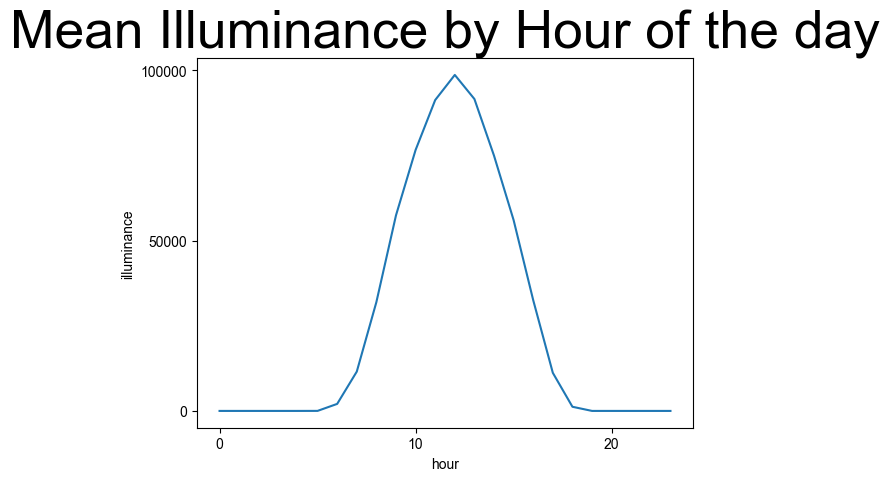

In [13]:
hourly_illum = prep_df.groupby('hour')['illuminance'].mean()
ill_hour=sns.lineplot(data=hourly_illum)
#ill_hour.set_xlim(left=0,right=23)
#ill_hour.set_ylim(bottom=0,top=7000)
sns.set(rc={'figure.figsize':(17,9)})
sns.set_context("paper", font_scale=4)  
plt.title("Mean Illuminance by Hour of the day")

## check outlier with Box plot, then clear it

<Axes: xlabel='illuminance'>

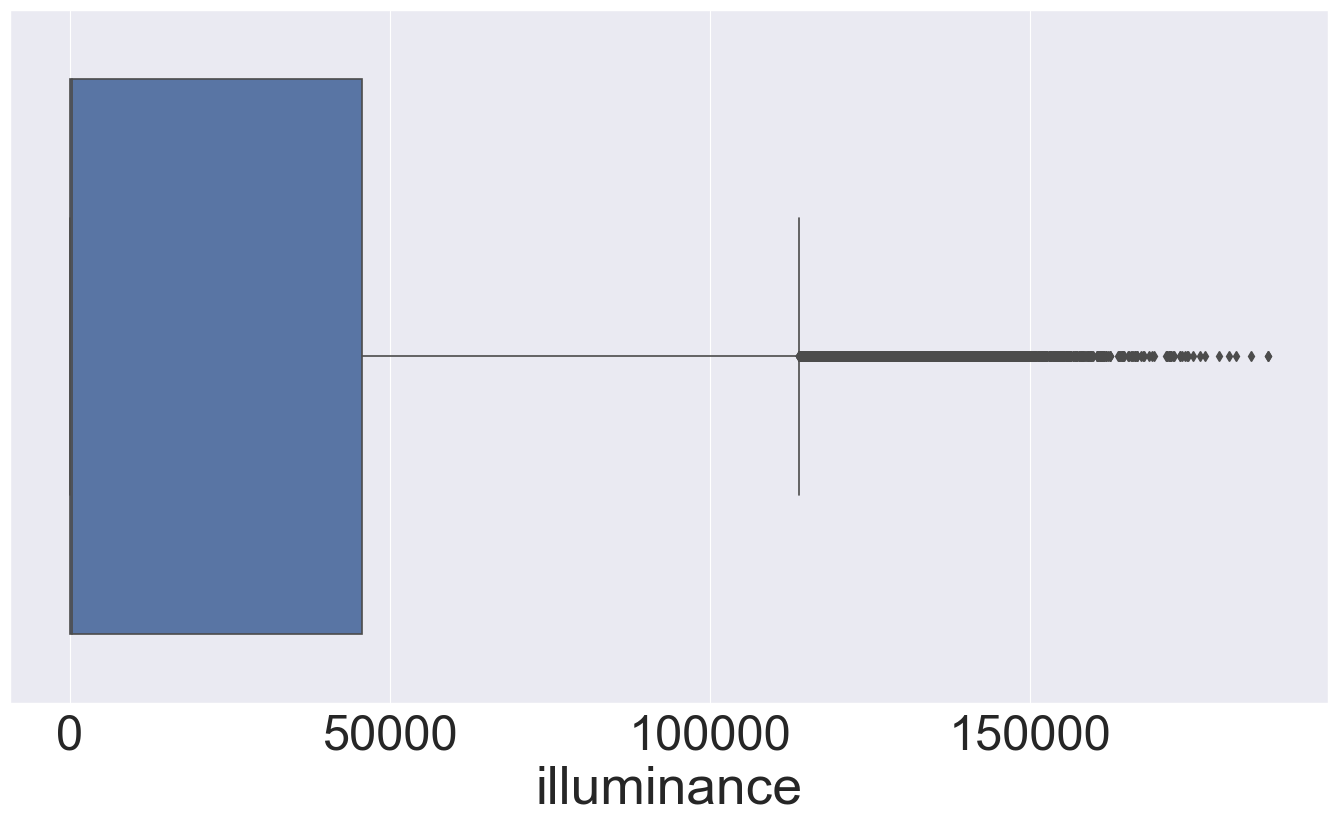

In [14]:
# use box plot to check outlier
sns.boxplot(data=prep_df,x="illuminance")

<Axes: xlabel='temperature'>

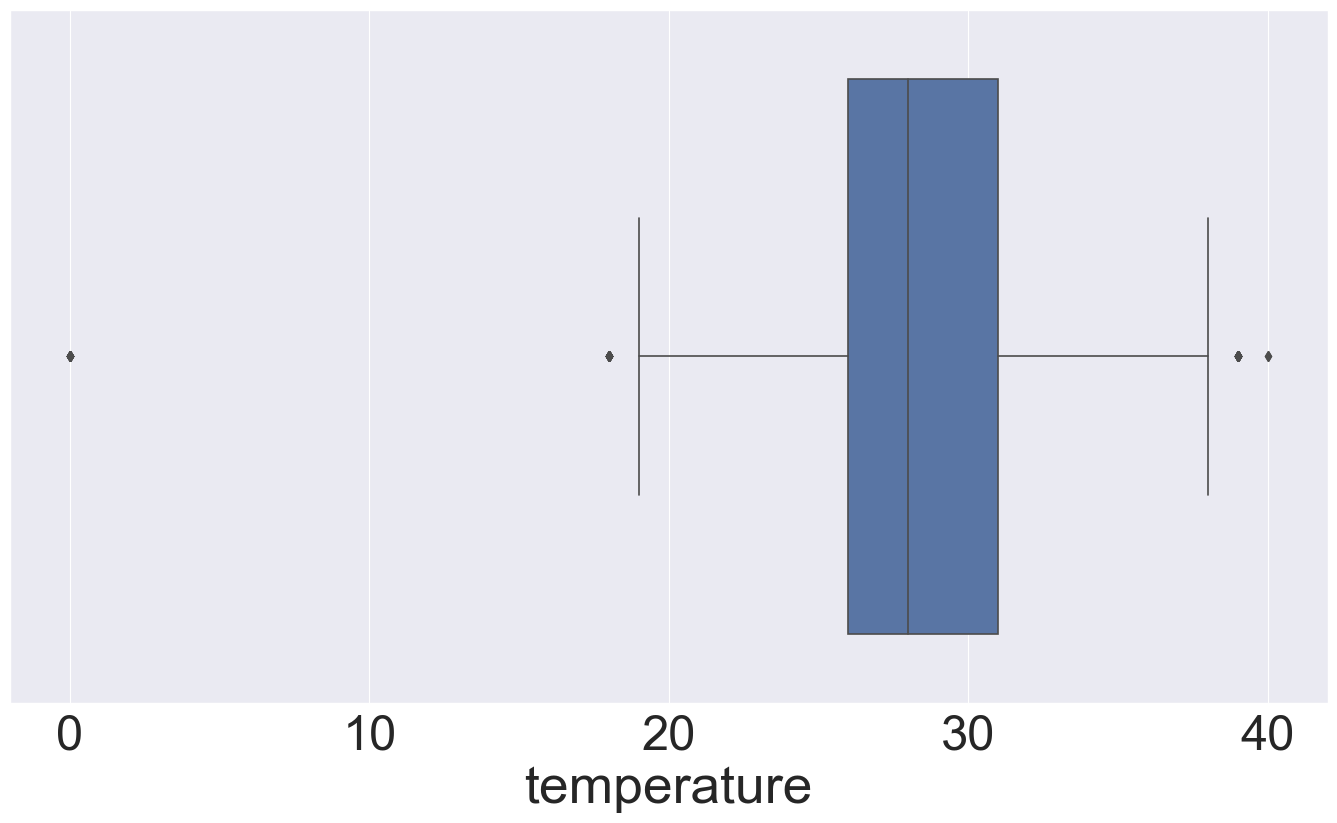

In [15]:
sns.boxplot(data=prep_df,x="temperature")

<Axes: xlabel='humidity'>

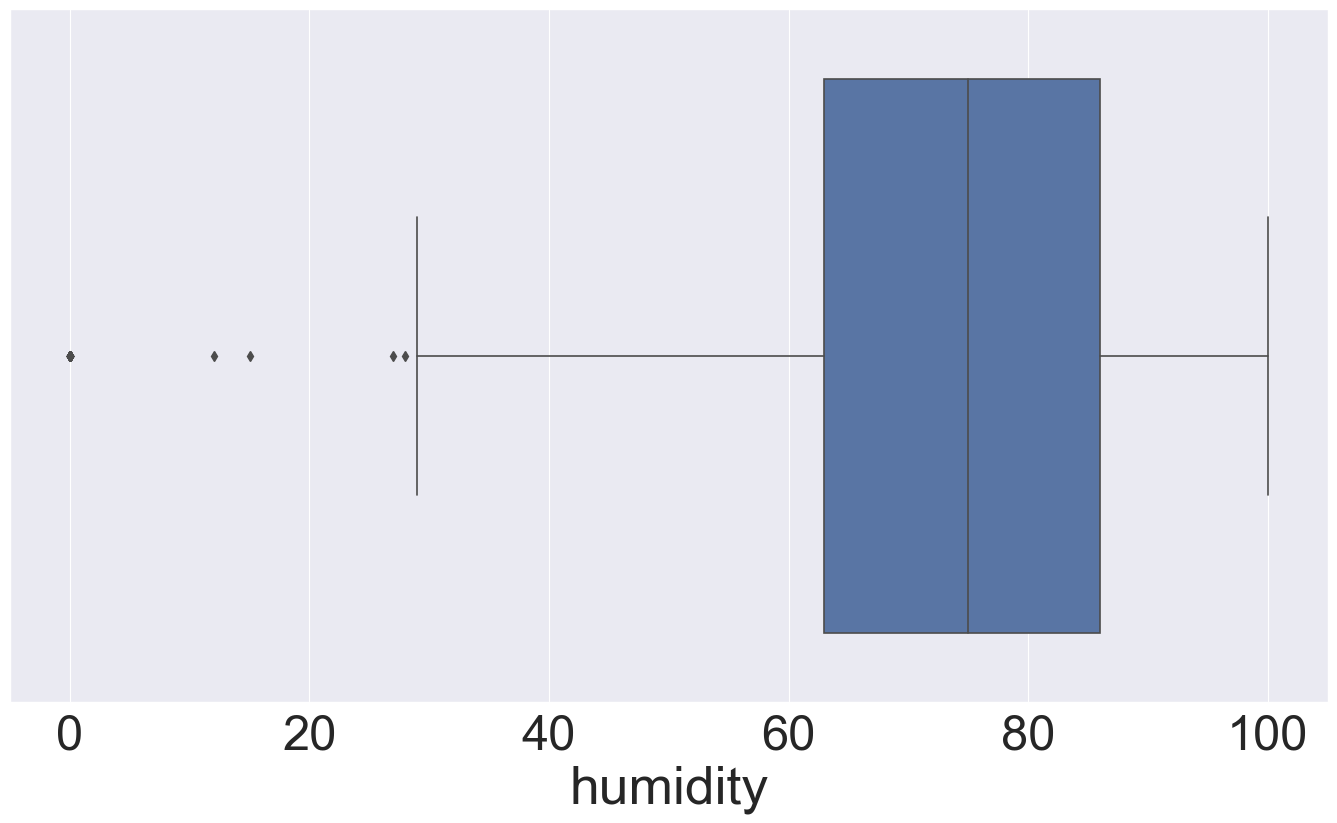

In [16]:
sns.boxplot(data=prep_df,x="humidity")

<Axes: xlabel='ultra_violet_a'>

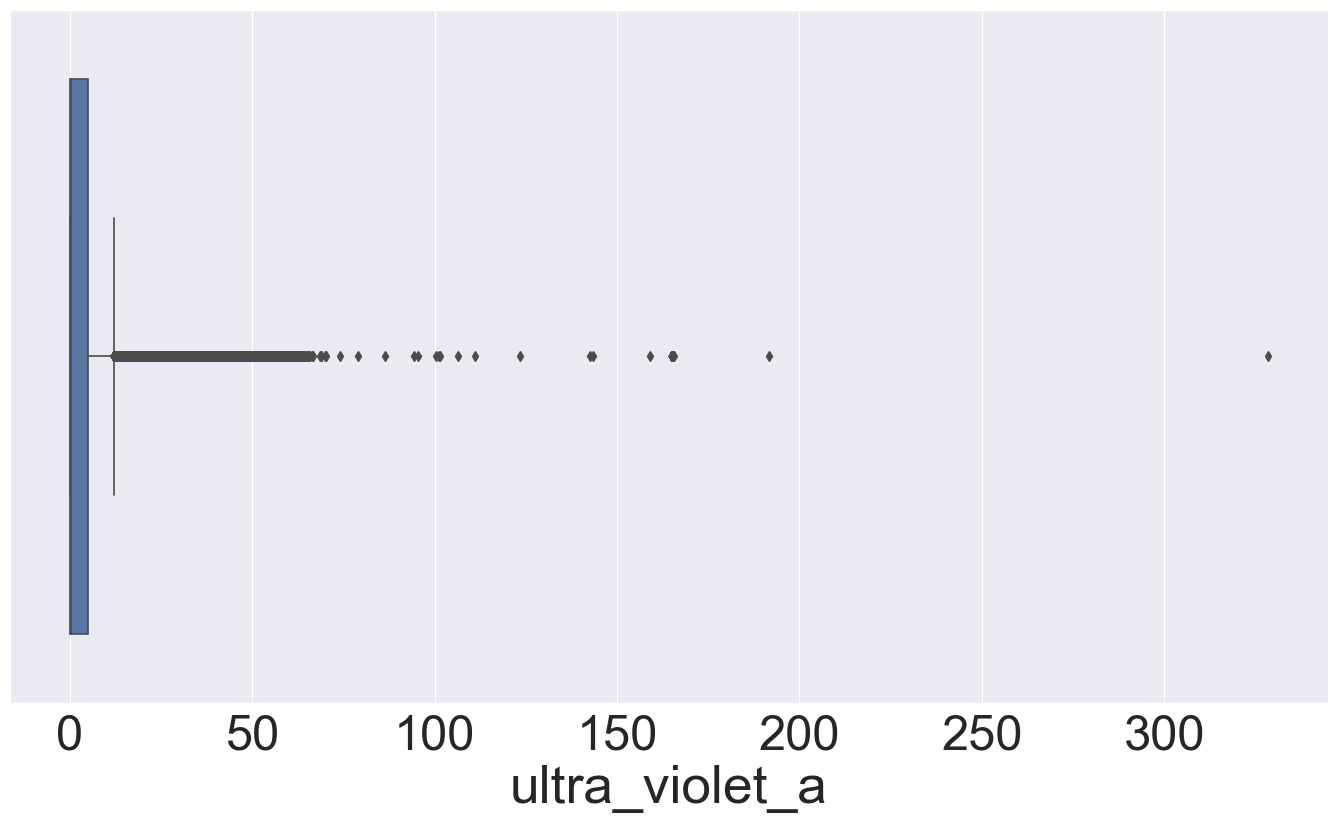

In [17]:
sns.boxplot(data=prep_df,x="ultra_violet_a")

<Axes: xlabel='ultra_violet_b'>

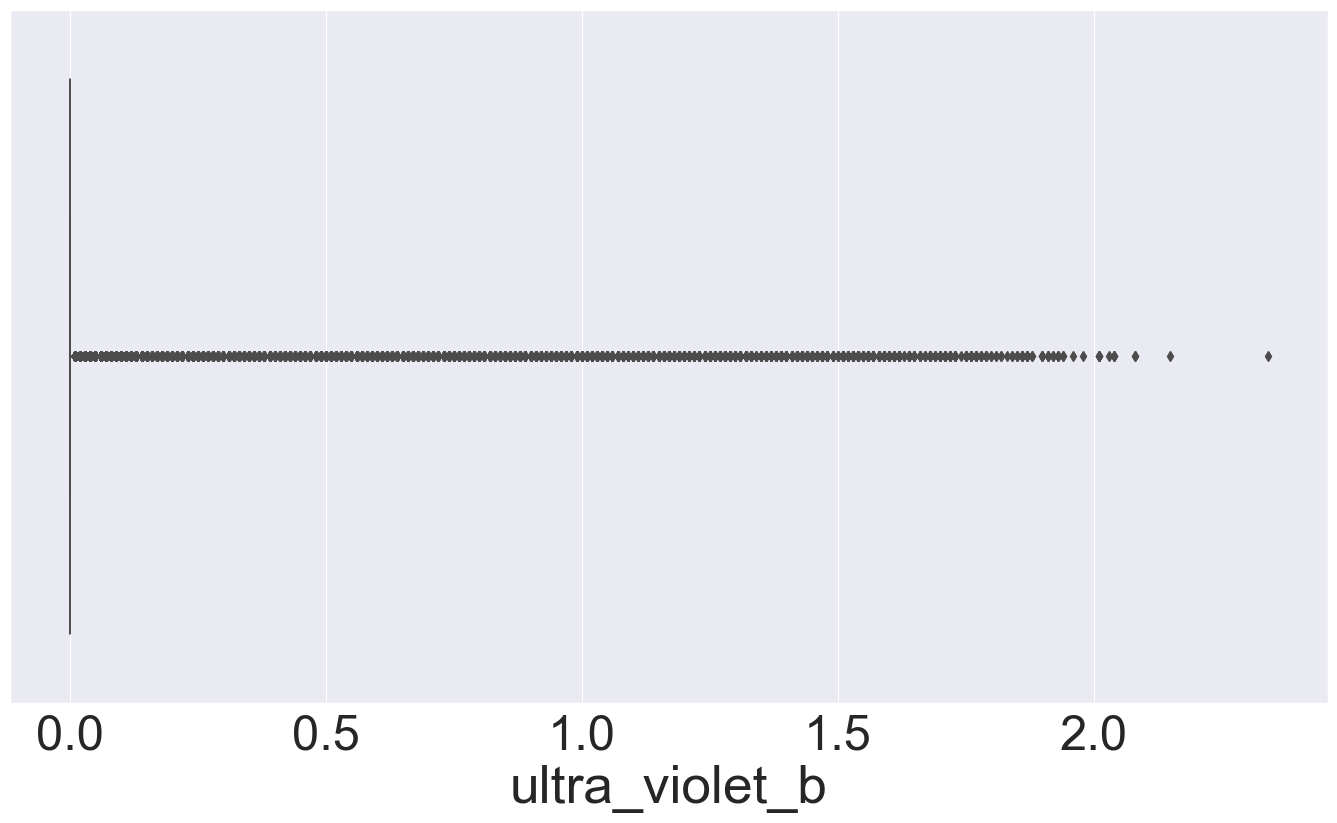

In [18]:
sns.boxplot(data=prep_df,x="ultra_violet_b")

<Axes: xlabel='max_wind_velocity'>

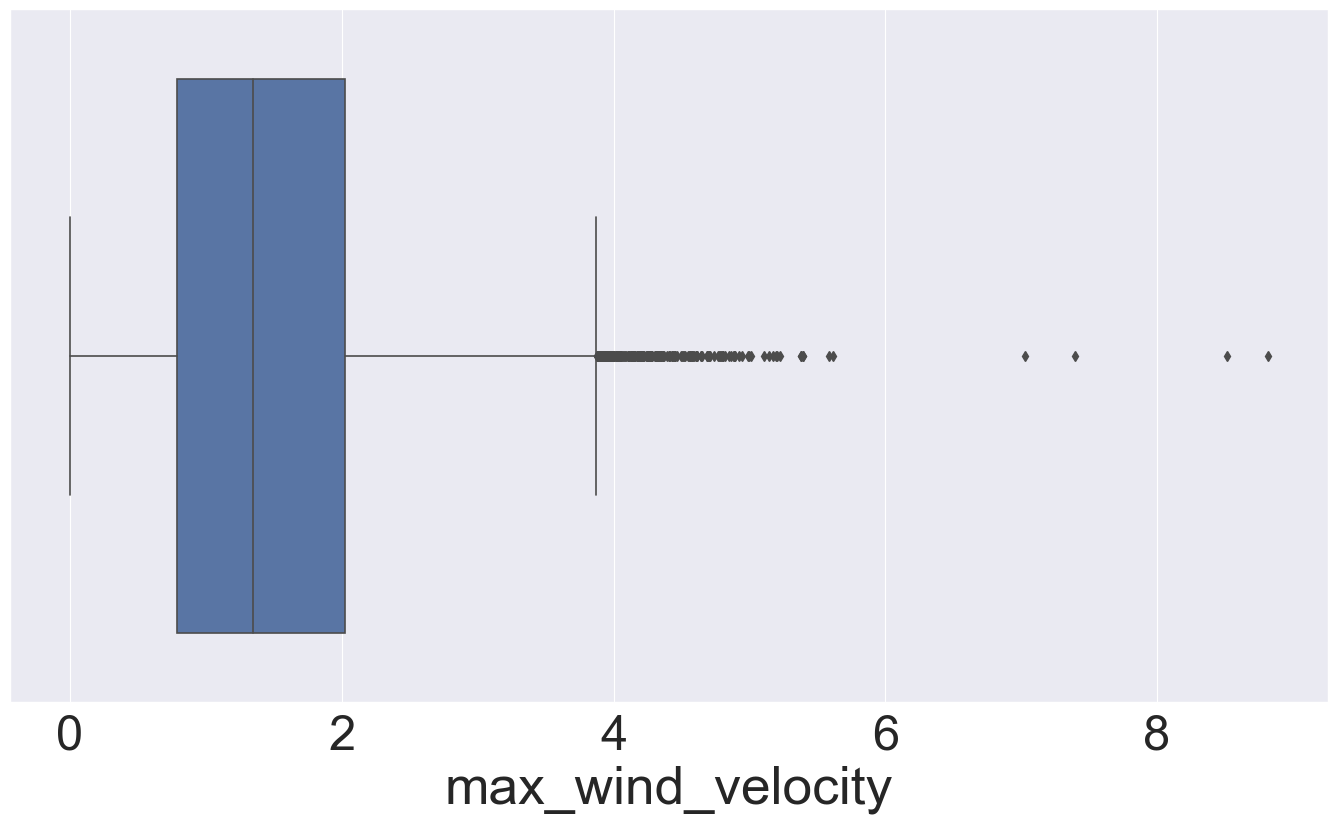

In [19]:
sns.boxplot(data=prep_df,x="max_wind_velocity")

<Axes: xlabel='direct_max_wind_velocity'>

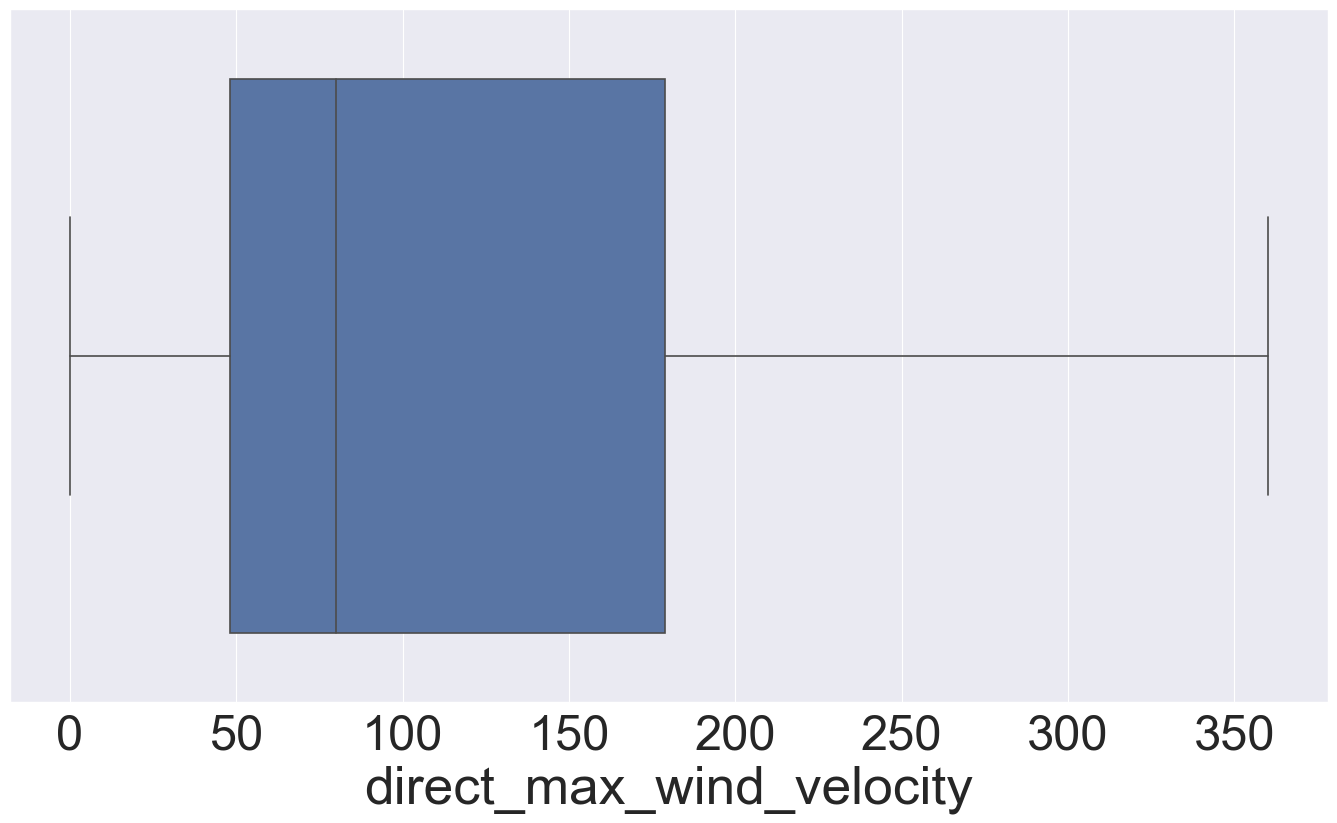

In [20]:
sns.boxplot(data=prep_df,x="direct_max_wind_velocity")

<Axes: xlabel='max_inst_wind_velocity'>

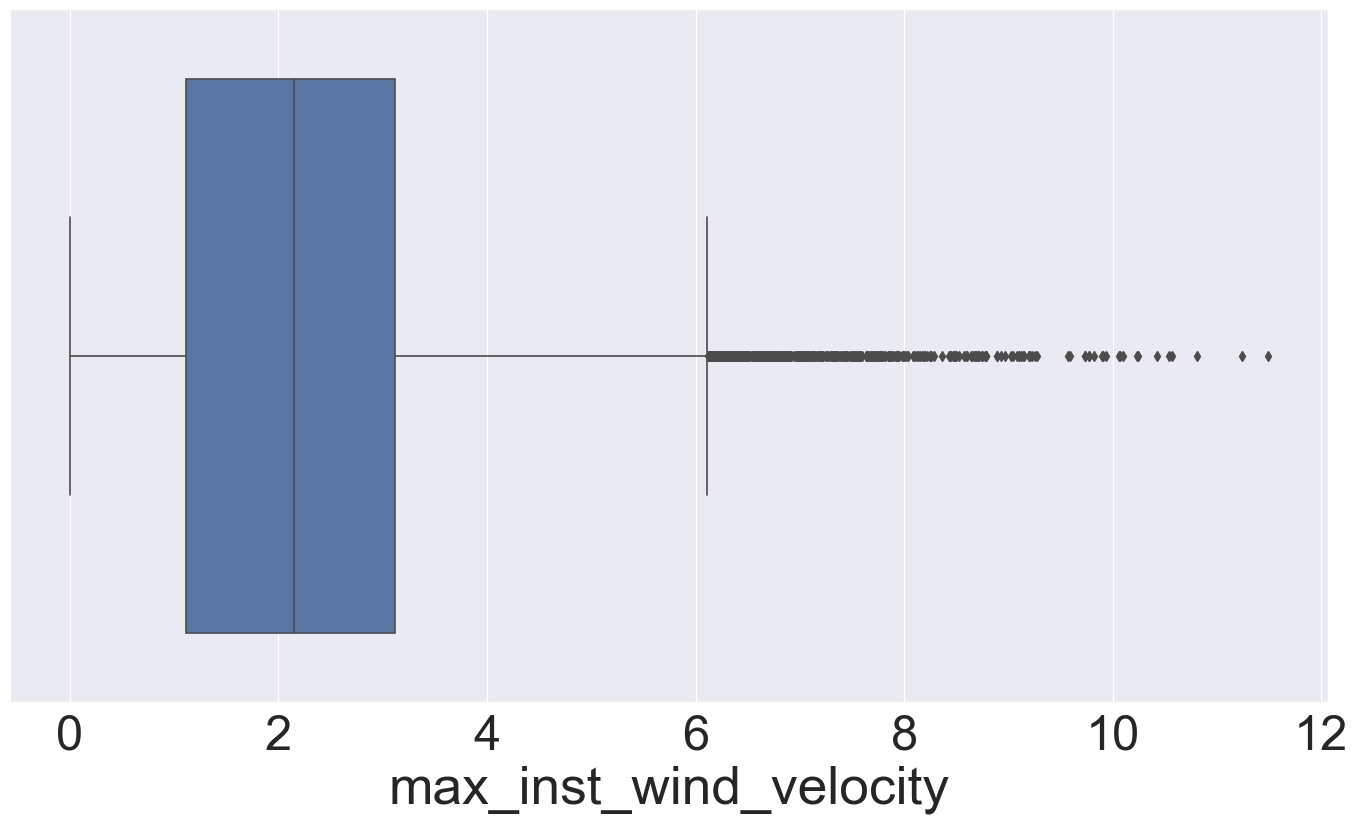

In [21]:
sns.boxplot(data=prep_df,x="max_inst_wind_velocity")

In [22]:
def cutOut(df,colName): # Cut outlier function
    q1=df[colName].quantile(0.25)
    q3=df[colName].quantile(0.75)
    IQR=q3-q1
    ol = df[(df[colName]<q1-1.5*IQR)|(df[colName]>q3 +1.5*IQR)].index
    cut_df=df.drop(ol)
    return cut_df

In [23]:
prep_df.columns

Index(['illuminance', 'time_stamp', 'temperature', 'humidity',
       'ultra_violet_a', 'ultra_violet_b', 'max_wind_velocity',
       'direct_max_wind_velocity', 'max_inst_wind_velocity', 'hour', 'month',
       'hour_minute'],
      dtype='object')

In [35]:
# cut all outliers using cutOut func
cut_df=prep_df.copy()
cut_df=cut_df.drop("time_stamp",axis=1)
cut_df=cut_df.drop("hour_minute",axis=1)
for col in cut_df.columns:
    cut_df=cutOut(cut_df,col)
cut_df.describe()

,illuminance,temperature,humidity,ultra_violet_a,ultra_violet_b,max_wind_velocity,direct_max_wind_velocity,max_inst_wind_velocity,hour,month
count,35484.000000,35484.000000,35484.000000,35484.000000,35484.0,35484.000000,35484.000000,35484.000000,35484.000000,35484.000000
mean,10028.279309,27.377015,77.882651,0.497678,0.0,1.284276,94.659170,1.940492,11.229906,6.439607
std,23922.768316,3.043783,14.284535,0.990068,0.0,0.760217,72.751542,1.208741,7.994842,3.750045
min,0.000000,19.000000,31.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,25.000000,69.000000,0.020000,0.0,0.808000,54.000000,1.120000,4.000000,3.000000
50%,0.000000,27.000000,80.000000,0.130000,0.0,1.252000,78.000000,1.873000,10.000000,7.000000
75%,3295.250000,29.000000,89.000000,0.350000,0.0,1.814000,129.000000,2.799250,19.000000,10.000000
max,113879.000000,38.000000,100.000000,6.330000,0.0,3.425000,299.000000,5.363000,23.000000,12.000000


In [36]:
new_df=cut_df.copy()
new_df=new_df.drop("ultra_violet_b",axis=1)
new_df.describe()

,illuminance,temperature,humidity,ultra_violet_a,max_wind_velocity,direct_max_wind_velocity,max_inst_wind_velocity,hour,month
count,35484.000000,35484.000000,35484.000000,35484.000000,35484.000000,35484.000000,35484.000000,35484.000000,35484.000000
mean,10028.279309,27.377015,77.882651,0.497678,1.284276,94.659170,1.940492,11.229906,6.439607
std,23922.768316,3.043783,14.284535,0.990068,0.760217,72.751542,1.208741,7.994842,3.750045
min,0.000000,19.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,25.000000,69.000000,0.020000,0.808000,54.000000,1.120000,4.000000,3.000000
50%,0.000000,27.000000,80.000000,0.130000,1.252000,78.000000,1.873000,10.000000,7.000000
75%,3295.250000,29.000000,89.000000,0.350000,1.814000,129.000000,2.799250,19.000000,10.000000
max,113879.000000,38.000000,100.000000,6.330000,3.425000,299.000000,5.363000,23.000000,12.000000


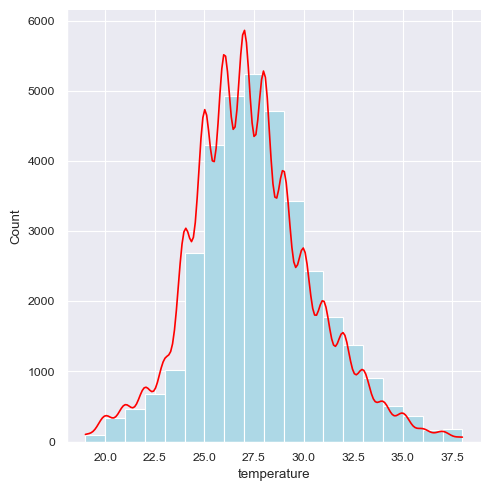

In [30]:
sns.set(rc={'figure.figsize':(19,11)})
sns.set_context("paper", font_scale=1) 
temp_D=sns.displot(new_df, x="temperature", binwidth=1, kde=True,facecolor='lightblue', color='red')

In [ ]:
humi_D=sns.displot(new_df, x="humidity", binwidth=2 , kde=True,facecolor='lightblue', color='red')

In [ ]:
ultA_D=sns.displot(new_df, x="ultra_violet_a", binwidth=.2, kde=True,facecolor='lightblue', color='red')

In [ ]:
maxw_D=sns.displot(new_df, x="max_wind_velocity", binwidth=.1, kde=True,facecolor='lightblue', color='red')

In [25]:
dirM_D=sns.displot(new_df, x="direct_max_wind_velocity", binwidth=9 , kde=True,facecolor='lightblue', color='red')

NameError: name 'new_df' is not defined

In [26]:
maxI_D=sns.displot(new_df, x="max_inst_wind_velocity", binwidth=.3, kde=True,facecolor='lightblue', color='red')

NameError: name 'new_df' is not defined

In [28]:
sns.set(rc={'figure.figsize':(17,9)})
sns.set_context("paper", font_scale=3) 
sns.regplot(x="illuminance",y="temperature", data=new_df, line_kws={"color": "red"})

NameError: name 'new_df' is not defined

<Axes: xlabel='illuminance', ylabel='humidity'>

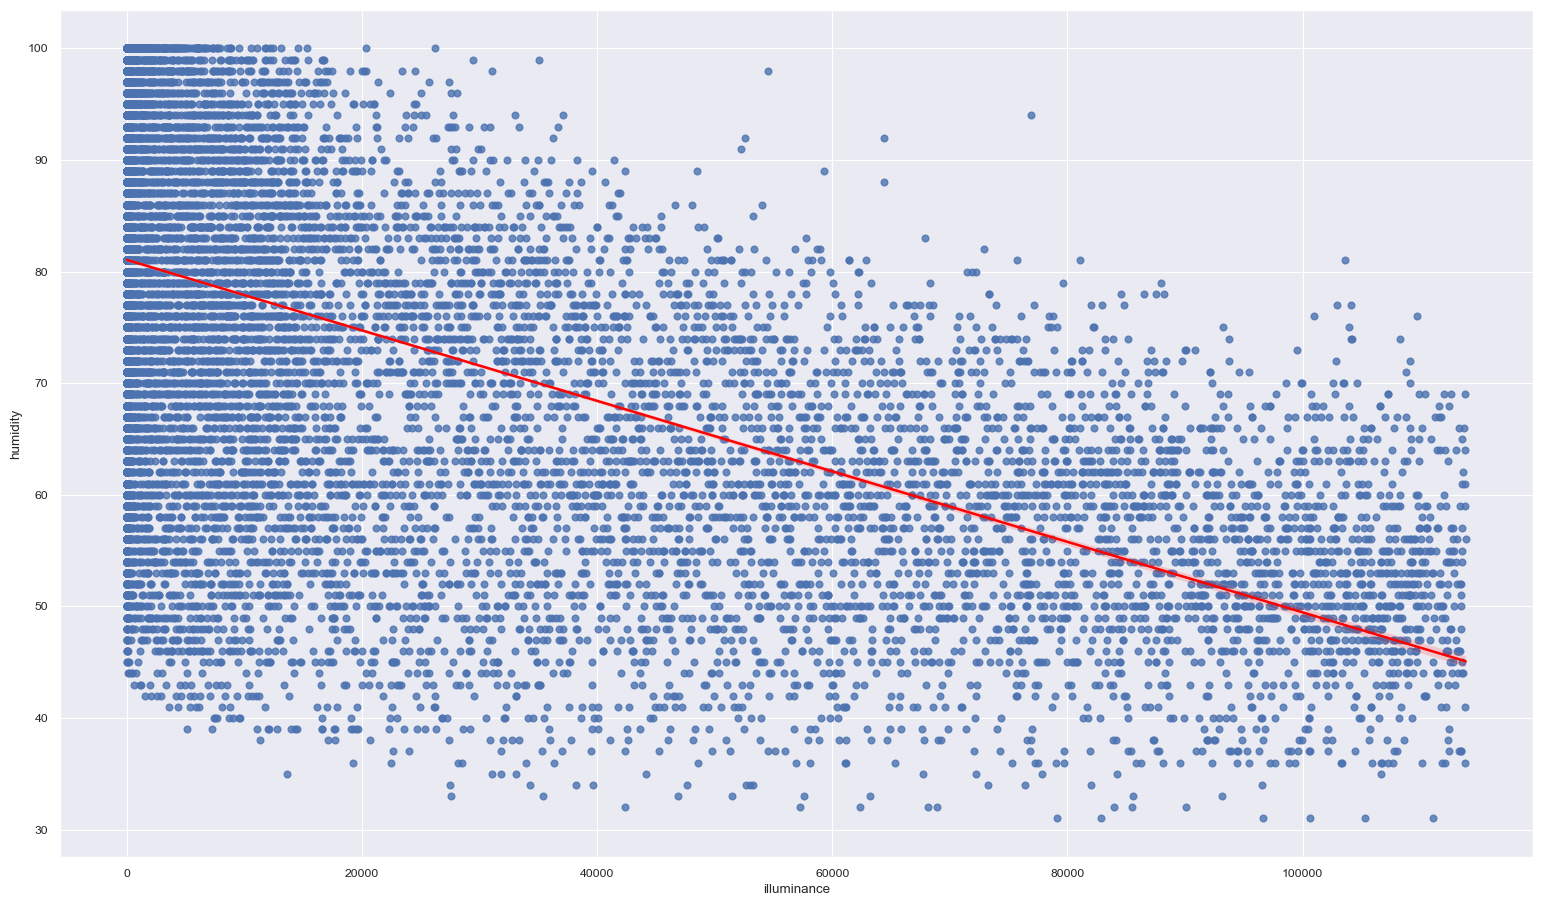

In [33]:
sns.regplot(x="illuminance",y="humidity", data=new_df, line_kws={"color": "red"})

In [37]:
new_df.columns

Index(['illuminance', 'temperature', 'humidity', 'ultra_violet_a',
       'max_wind_velocity', 'direct_max_wind_velocity',
       'max_inst_wind_velocity', 'hour', 'month'],
      dtype='object')

<Axes: xlabel='coefficient', ylabel='feature'>

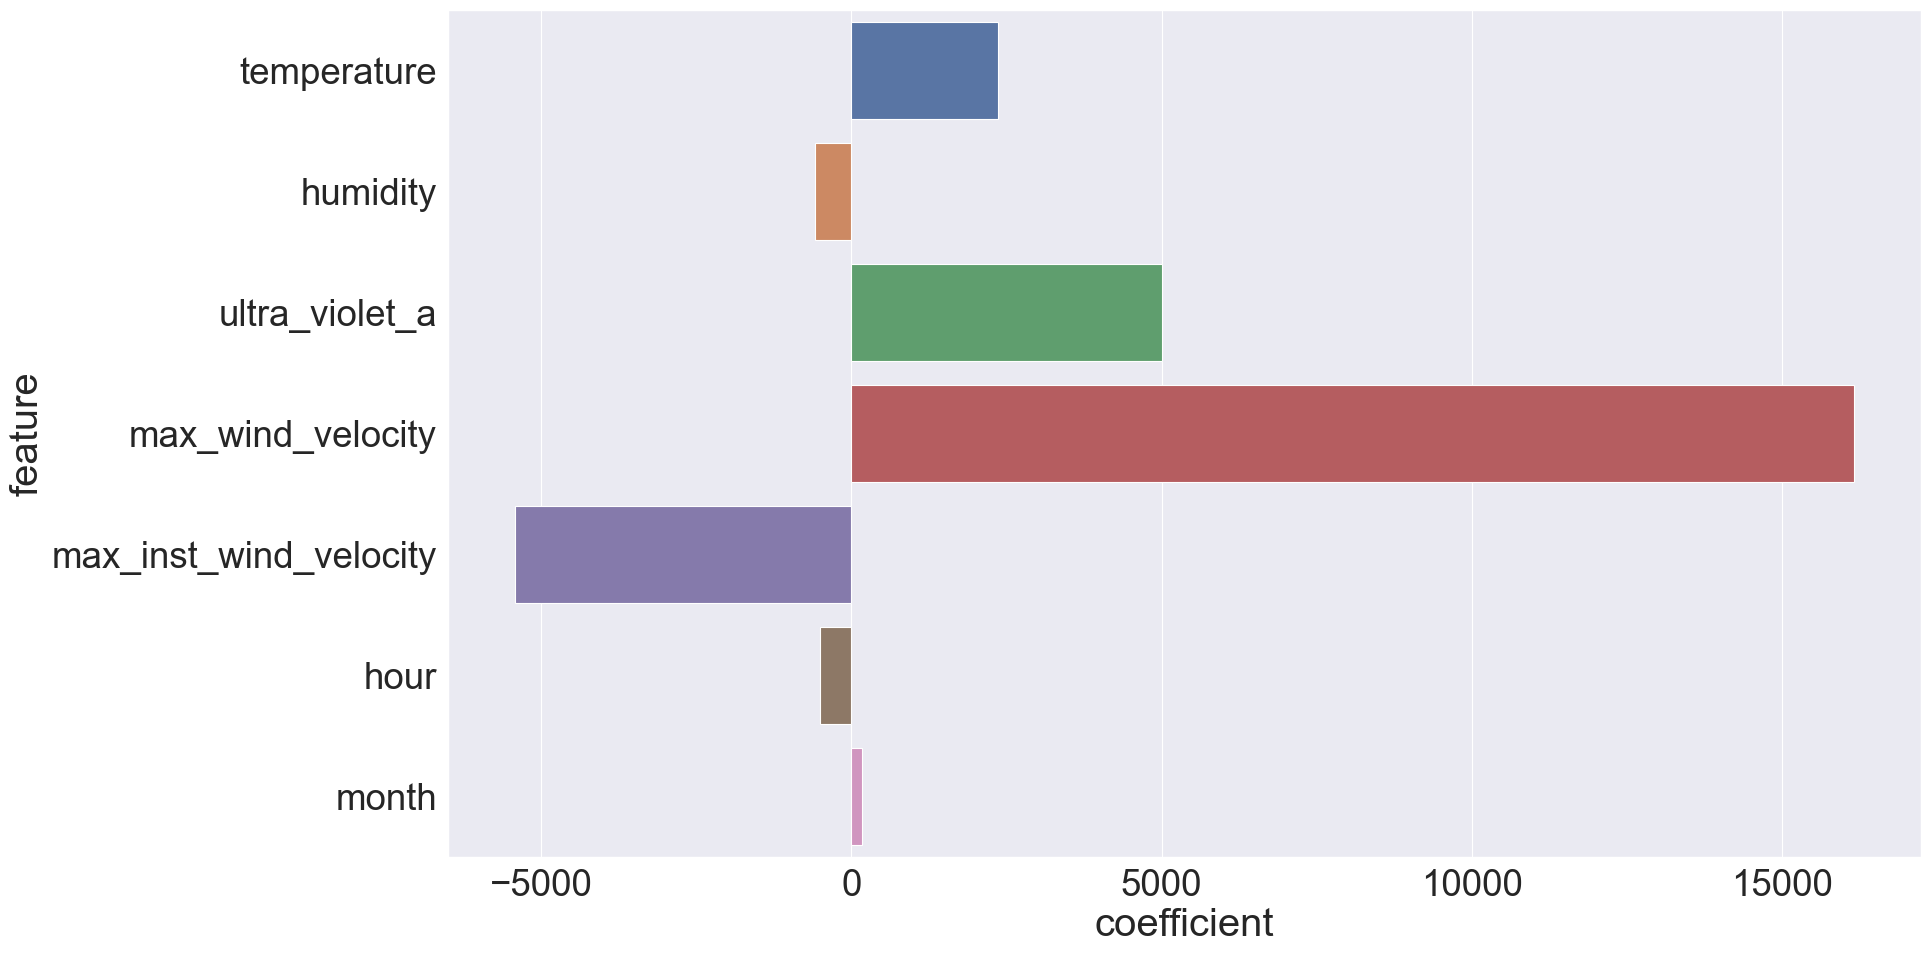

In [42]:
X = new_df[['temperature', 'humidity', 'ultra_violet_a', 'max_wind_velocity', 'max_inst_wind_velocity', 'hour', 'month']]
y = new_df['illuminance']

# initialize the linear regression model
model = LinearRegression()

# fit the model to the data
model.fit(X, y)

# print the coefficients for each feature
coef_df = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_})

# change font size
sns.set_context("paper", font_scale=3) 
# plot the coefficients using seaborn
sns.barplot(x='coefficient', y='feature', data=coef_df)

In [ ]:
# make a prediction for a new set of data
new_data = [[25, 70, 0.5, 0, 0, 0], [20, 60, 0.2, 1, 1, 1]]
prediction = model.predict(new_data)
print('Predicted illuminance:', prediction)

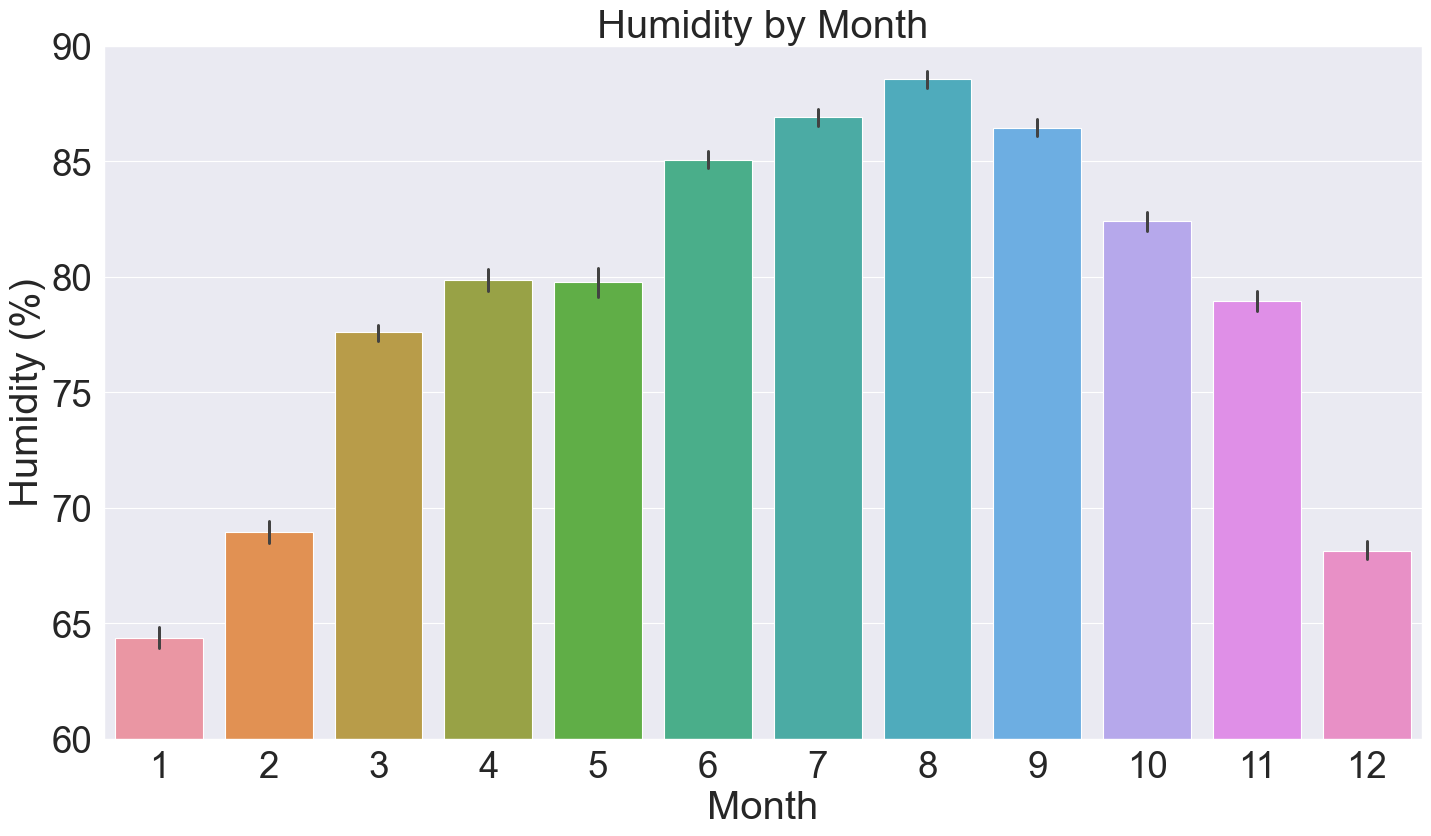

In [117]:
sns.barplot(x='month', y='humidity', data=cut_df)

# Set the plot title and axis labels
plt.title('Humidity by Month')
plt.xlabel('Month')
plt.ylabel('Humidity (%)')
plt.ylim(60,90)

# Show the plot
plt.show()

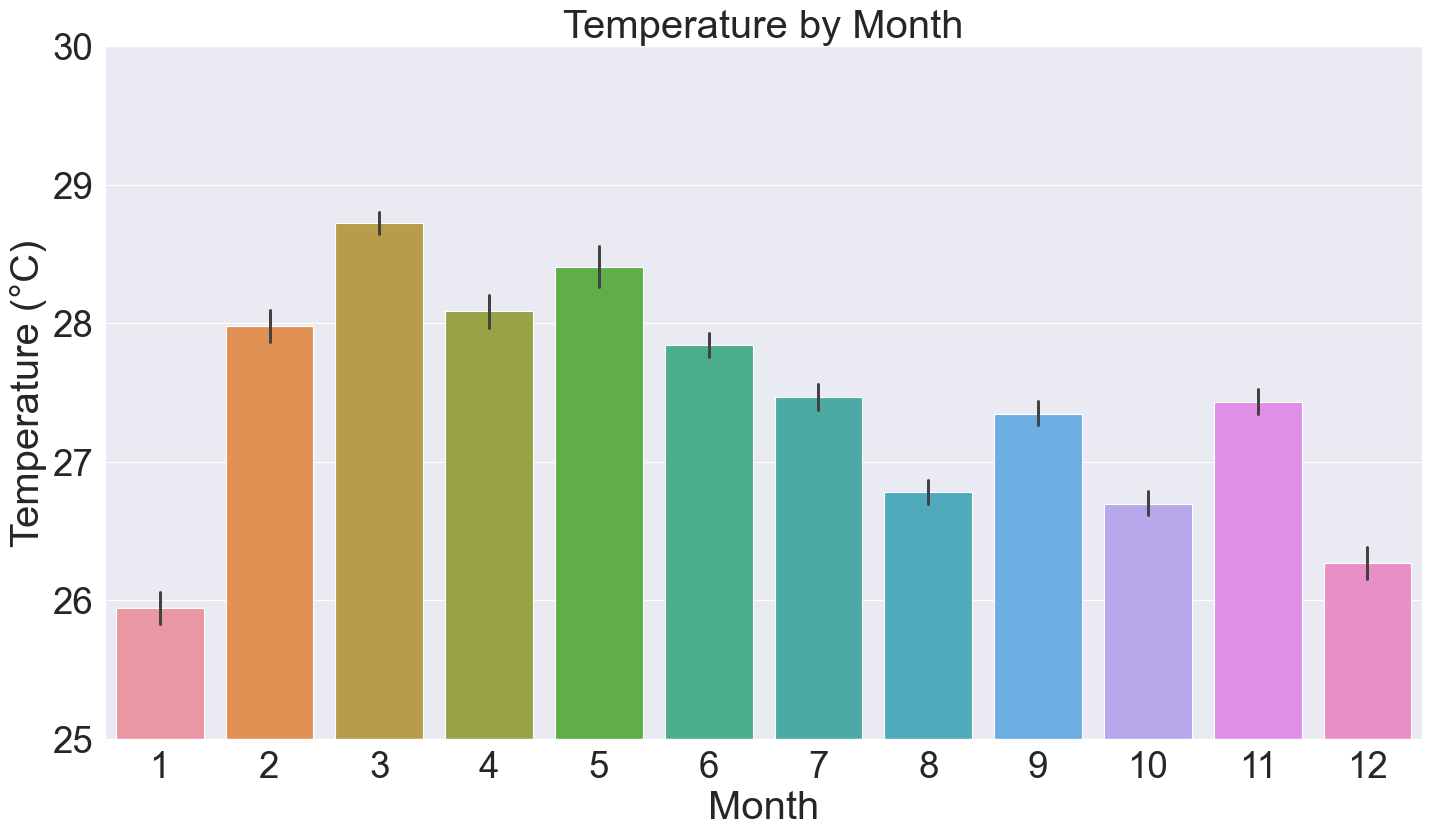

In [119]:
sns.barplot(x='month', y='temperature', data=cut_df)

# Set the plot title and axis labels
plt.title('Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.ylim(25,30)

# Show the plot
plt.show()